In [1]:

import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()


# quick_plot_setup(use_tex=True)

In [2]:
from pcpptc import PolygonInstance, Solution
from pcpptc.plot import setup_plot, plot_polygon_instance, plot_solution
from pcpptc.plot.polgyon_instance import plot_coverage

In [3]:
data = pd.read_json("./06_data.json")

In [4]:
data.sort_values(["solver"], inplace=True, ascending=True)
data.sort_values(["type"], inplace=True, ascending=True, kind="stable")

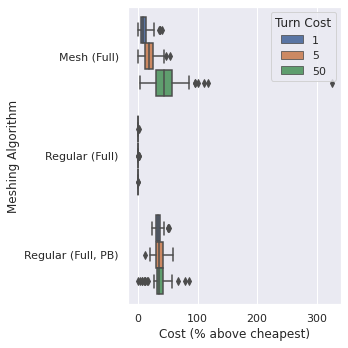

In [6]:
plt.figure(figsize=(5, 5))
sns.boxplot(data=data, y="solver", x="relative_cost", orient="h", hue="turn_factor")
plt.xlabel("Cost (% above cheapest)")
plt.ylabel("Meshing Algorithm")
plt.legend(title="Turn Cost")
plt.tight_layout()
plt.show()

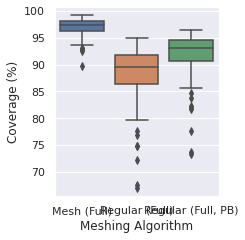

In [7]:
plt.figure(figsize=(3.5, 3.5))
sns.boxplot(data=data, x="solver", y="relative_coverage", orient="v")
plt.ylabel("Coverage (%)")
plt.xlabel("Meshing Algorithm")

plt.tight_layout()
plt.show()

In [8]:
t_ = data.dropna()
t_ = t_.groupby(["solver"])["instance"].nunique()
t_

solver
Mesh (Full)           200
Regular (Full)        200
Regular (Full, PB)    200
Name: instance, dtype: int64

In [9]:
t = data.groupby(["solver"])["runtime"].mean().reset_index()
t["solver"] = t["solver"].apply(lambda s: s.replace("□", "$\\square$"))
t["solver"] = t["solver"].apply(lambda s: s.replace("△", "$\\Delta$"))
t["solver"] = t["solver"].apply(lambda s: s.replace("%", "\\%"))
for i, t in t.iterrows():
    print(t["solver"], "&", round(t["runtime"], 1), "\\\\")

Mesh (Full) & 150.3 \\
Regular (Full) & 115.3 \\
Regular (Full, PB) & 283.9 \\


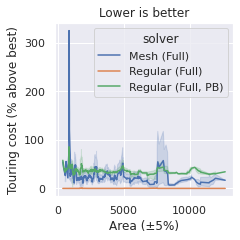

In [12]:
from _utils import convert_to_percentage_interval

percent = 5
t = convert_to_percentage_interval(
    table=data[["area", "relative_cost", "solver", "instance", "relative_coverage"]],
    on_column="area",
    percentage=percent,
    round_=round,
)
plt.figure(figsize=(3.5, 3.5))
sns.lineplot(data=t, x="area", y="relative_cost", hue="solver")
plt.title("Lower is better")
plt.ylabel("Touring cost (% above best)")
plt.xlabel(f"Area (±{percent}%)")
plt.tight_layout()
plt.savefig("06_touring_cost.pdf")
plt.show()

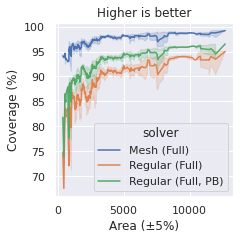

In [13]:
plt.figure(figsize=(3.5, 3.5))
sns.lineplot(data=t, x="area", y="relative_coverage", hue="solver")
plt.title("Higher is better")
plt.ylabel("Coverage (%)")
plt.xlabel(f"Area (±{percent}%)")
plt.tight_layout()
plt.savefig("06_coverage.pdf")
plt.show()